# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 10</font>
## <font color='blue'>Design e Construção de 50 Visualizações</font>
## <font color='blue'>Visualizações de 44 a 50</font>

![title](imagens/Projeto10.png)

## Pré-Requisitos

Recomendamos que você tenha concluído pelo menos os 5 primeiros capítulos do curso gratuito de <a href="https://www.datascienceacademy.com.br/course?courseid=python-fundamentos">Python Fundamentos Para Análise de Dados</a>. Recomendamos ainda o capítulo sobre Machine Learning nesse mesmo curso.

### Definição do Problema e Fonte de Dados

Leia os manuais em pdf no Capítulo 11 do curso.

Neste mini-projeto o objetivo será analisar dados sobre o padrão de compras de consumidores em um Shopping Center.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.3.5
matplotlib: 3.4.3
numpy     : 1.21.5
seaborn   : 0.11.2



In [5]:
df = pd.read_csv("dados/dataset7.csv")

In [6]:
df.shape

(2240, 28)

In [7]:
pd.options.display.max_columns = df.shape[1]

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [9]:
df.rename({' Income ':'Income'}, axis = 1, inplace = True)
df['Income'] = df['Income'].str.replace('$','').str.replace(',','').astype(float)

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [11]:
df['Income'].fillna(df['Income'].mean(), inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [14]:
df['Customer_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

In [15]:
df['Grupo_Etario_Clientes'] = pd.cut(df.Customer_age, bins = [0,25,50,150], labels = ['Jovem', 'Adulto', 'Idoso'])

In [16]:
df['Total_Purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

In [17]:
df['Children'] = df['Kidhome']+df['Teenhome']

In [18]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_age,Grupo_Etario_Clientes,Total_Purchases,Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,...,6,1,0,0,0,0,0,1,0,SP,44,Adulto,15,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,...,7,5,0,0,0,0,1,1,0,CA,53,Idoso,18,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,...,5,2,0,0,0,0,0,0,0,US,56,Idoso,11,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,...,2,7,0,0,0,0,0,0,0,AUS,47,Adulto,4,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,...,2,7,1,0,0,0,0,1,0,SP,25,Jovem,8,1


> Dataviz 44 - Gráfico de barras com a relação entre income (salário) e país com base no grupo etário

Text(0, 0.5, 'Salário')

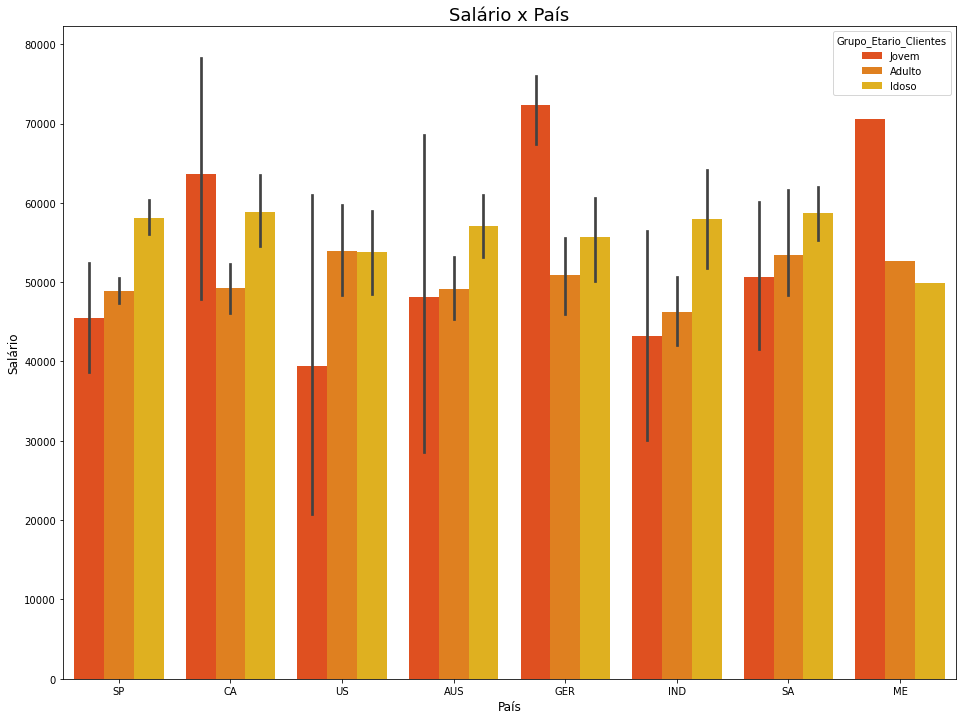

In [19]:
# Dataviz 44
plt.figure(figsize = (16,12))

sns.barplot(x = 'Country', 
            y = 'Income', 
            hue = 'Grupo_Etario_Clientes', 
            data = df, 
            estimator = np.mean, 
            palette = 'autumn')

plt.title('Salário x País', fontsize = 18)
plt.xlabel('País', fontsize  = 12)
plt.ylabel('Salário', fontsize = 12)

> Dataviz 45 - Boxplot com a distribuição da variável de total de compras com base na idade

Text(0, 0.5, 'Total de Compras')

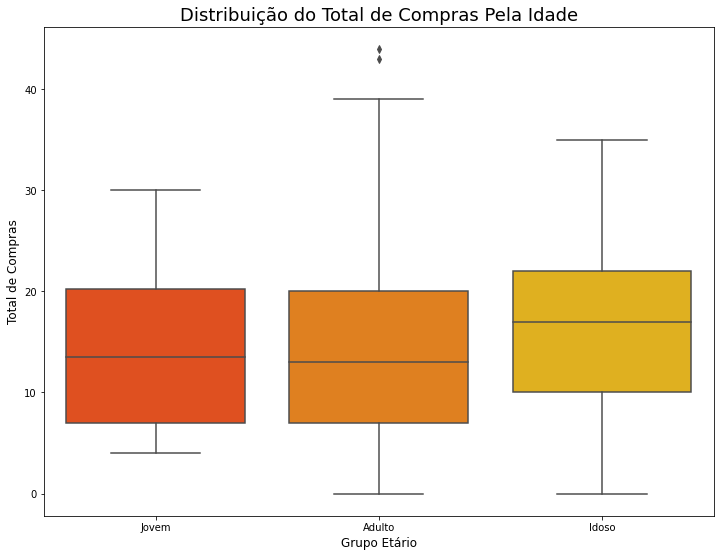

In [20]:
# Dataviz 45
plt.figure(figsize = (12,9))
sns.boxplot(x = 'Grupo_Etario_Clientes', y = 'Total_Purchases', data = df, palette = 'autumn')
plt.title('Distribuição do Total de Compras Pela Idade', fontsize = 18)
plt.xlabel('Grupo Etário', fontsize = 12)
plt.ylabel('Total de Compras', fontsize = 12)

> Dataviz 46 - Boxplot com a distribuição da variável de total de compras com base no país

Text(0, 0.5, 'Total de Compras')

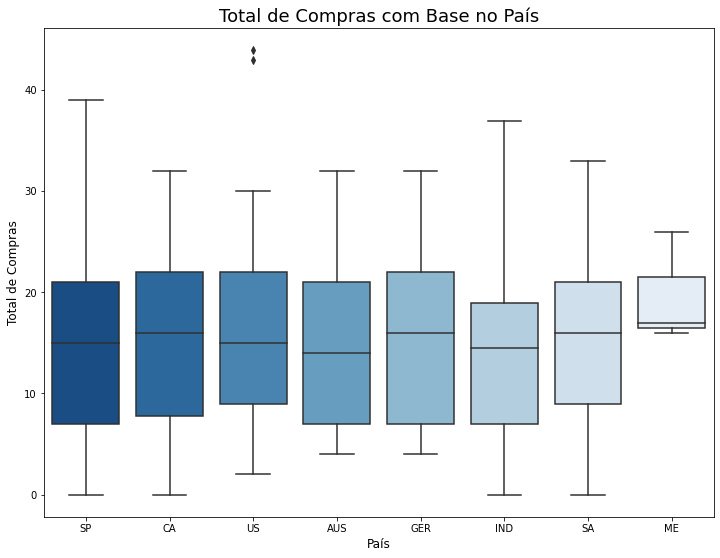

In [21]:
# Dataviz 46
plt.figure(figsize = (12,9))
sns.boxplot(x = 'Country', y = 'Total_Purchases', data = df, palette = 'Blues_r')
plt.title('Total de Compras com Base no País', fontsize = 18)
plt.xlabel('País', fontsize = 12)
plt.ylabel('Total de Compras', fontsize = 12)

> Dataviz 47 - Stackedbar (Gráfico de barras empilhadas) com a relação entre número de crianças em casa e número de produtos comprados, com a legenda contendo o tipo de produto

([<matplotlib.axis.XTick at 0x7fae0cfc0d90>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

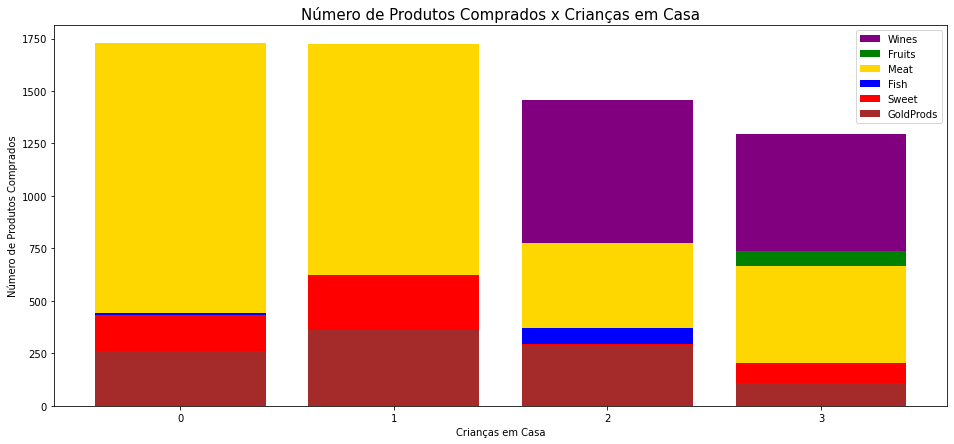

In [22]:
# Dataviz 47
plt.figure(figsize = (16,7))

products = ['MntWines', 
            'MntFruits',
            'MntMeatProducts', 
            'MntFishProducts', 
            'MntSweetProducts',
            'MntGoldProds']

color = ['purple', 'green', 'gold', 'blue', 'red', 'brown']

for i, p, c in zip(range(1,len(products)+1), products, color):
    
    if i != 6:
        bottom = df[products[i]]
        plt.bar(x = df['Children'], height = df[p], color = c, bottom = bottom)
    else:
        plt.bar(x = df['Children'], height = df[p], color = c)
        
plt.xlabel('Crianças em Casa')
plt.ylabel('Número de Produtos Comprados')
plt.title('Número de Produtos Comprados x Crianças em Casa', fontsize = 15)

plt.legend([p.replace('Mnt','').replace('Products','') for p in products])
plt.xticks(df['Children'].unique())

> Dataviz 48 - Subplots com gráficos de barras mostrando a relação entre número de crianças em casa e o número de produtos comprados. Cada subplot representa um tipo de produto.

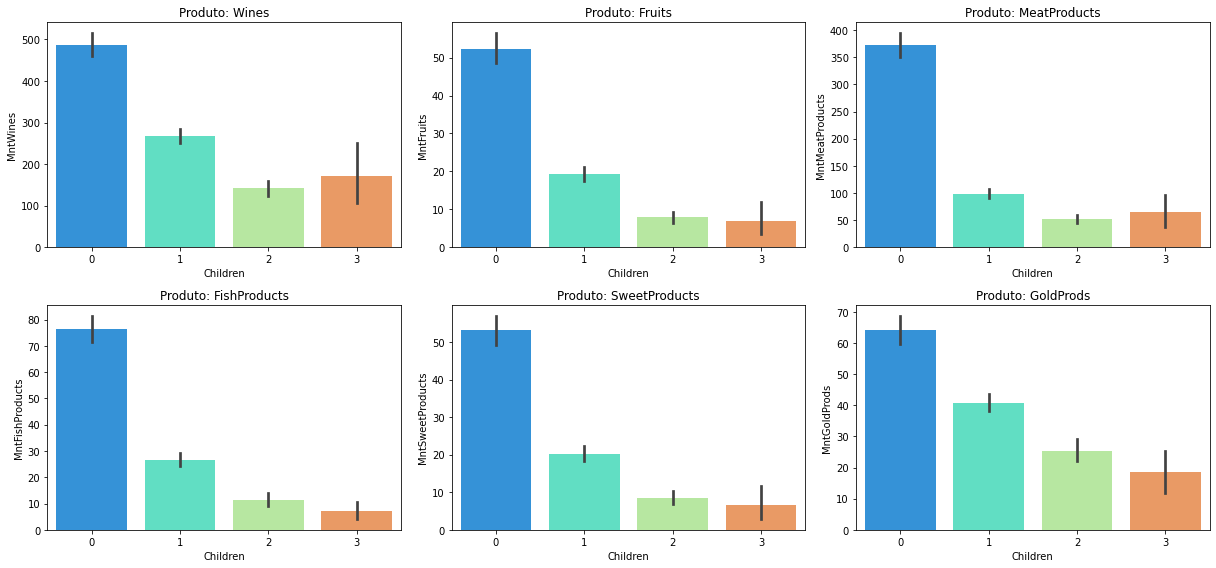

In [23]:
# Dataviz 48
products = ['MntWines', 
            'MntFruits',
            'MntMeatProducts', 
            'MntFishProducts', 
            'MntSweetProducts',
            'MntGoldProds']

row, col = 2, 3
p = 0

fig, ax = plt.subplots(row, col, figsize = (17,8))

for i in range(row):
    for j in range(col):
        plot = sns.barplot(x = df['Children'], y = df[products[p]], palette = 'rainbow', ax = ax[i,j])
        plot.set_title('Produto: ' + products[p].replace('Mnt',''))
        p += 1
        
fig.tight_layout()

> Dataviz 49 - Stackedbar (Gráfico de barras empilhadas) com a relação estado civil e o número de produtos comprados, com a legenda contendo o tipo de produto

([<matplotlib.axis.XTick at 0x7fadf75bdfa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

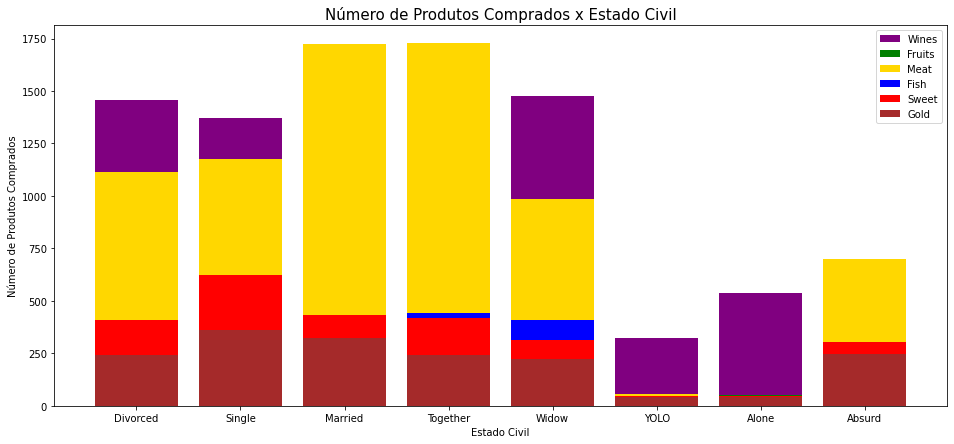

In [24]:
# Dataviz 49
plt.figure(figsize = (16,7))

products = ['MntWines', 
            'MntFruits',
            'MntMeatProducts', 
            'MntFishProducts', 
            'MntSweetProducts',
            'MntGoldProds']

color = ['purple','green','gold','blue','red','brown']

for i, p, c in zip(range(1, len(products)+1), products, color):
    
    if i != 6:
        bottom = df[products[i]]
        plt.bar(x = df['Marital_Status'], height = df[p], color = c, bottom = bottom)
    else:
        plt.bar(x = df['Marital_Status'], height = df[p], color = c)
        
plt.xlabel('Estado Civil')
plt.ylabel('Número de Produtos Comprados')
plt.title('Número de Produtos Comprados x Estado Civil', fontsize = 15)

plt.legend([p.replace('Mnt','').replace('Products','').replace('Prods','') for p in products])
plt.xticks(df['Marital_Status'].unique())

> Dataviz 50 - Subplots com gráficos de barras mostrando a relação entre estado civil e o número de produtos comprados. Cada subplot representa um tipo de produto.

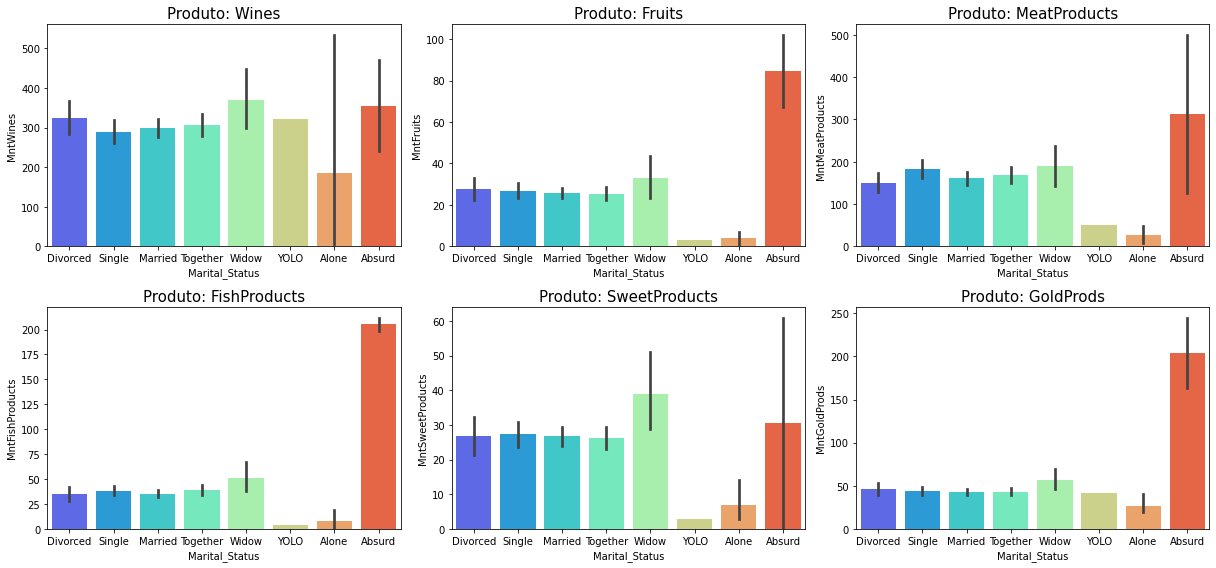

In [25]:
# Dataviz 50
products = ['MntWines', 
            'MntFruits',
            'MntMeatProducts', 
            'MntFishProducts', 
            'MntSweetProducts',
            'MntGoldProds']

row, col = 2, 3
p = 0

fig, ax = plt.subplots(row, col, figsize = (17,8))

for i in range(row):
    for j in range(col):
        plot = sns.barplot(x = df['Marital_Status'], y = df[products[p]], palette = 'rainbow', ax = ax[i,j])
        plot.set_title('Produto: ' + products[p].replace('Mnt',''), fontsize = 15)
        p += 1
        
fig.tight_layout()

# Fim